In [1]:
library(GLMsData)
library(statmod)
library(MASS)

Warning message:
"package 'statmod' was built under R version 3.6.3"

In [2]:
data(failures)

In [3]:
str(failures)

'data.frame':	9 obs. of  4 variables:
 $ Period  : int  1 2 3 4 5 6 7 8 9
 $ Time1   : num  33.3 52.2 64.7 137 125.9 ...
 $ Time2   : num  25.3 14.4 32.5 20.5 97.6 53.6 56.6 87.3 47.8
 $ Failures: int  15 9 14 24 27 27 23 18 22


In [18]:
failures

Period,Time1,Time2,Failures
1,33.3,25.3,15
2,52.2,14.4,9
3,64.7,32.5,14
4,137.0,20.5,24
5,125.9,97.6,27
6,116.3,53.6,27
7,131.7,56.6,23
8,85.0,87.3,18
9,91.9,47.8,22


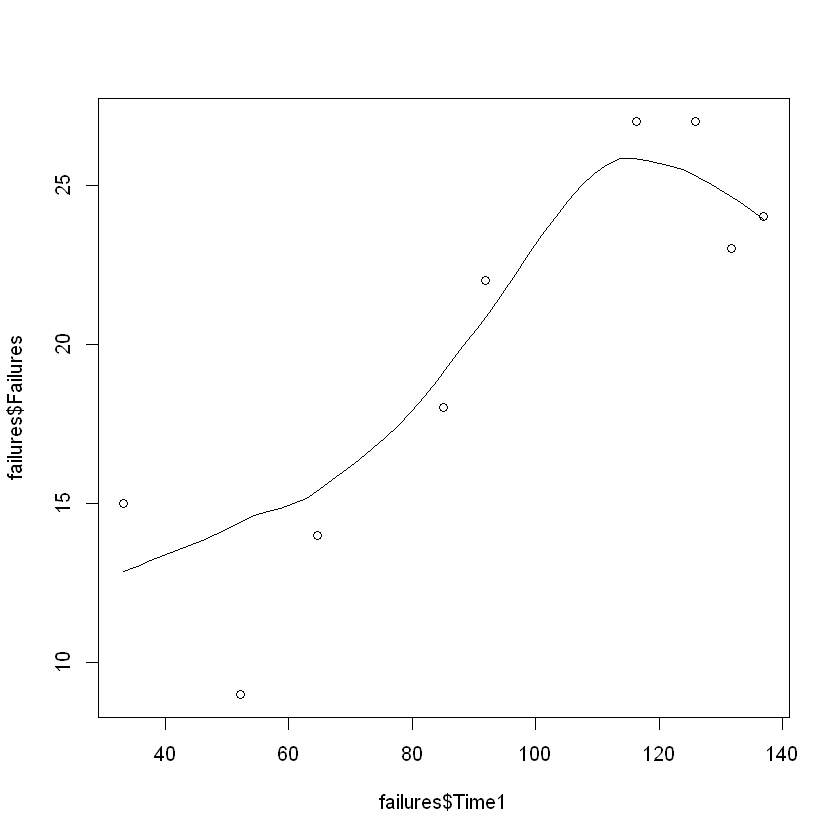

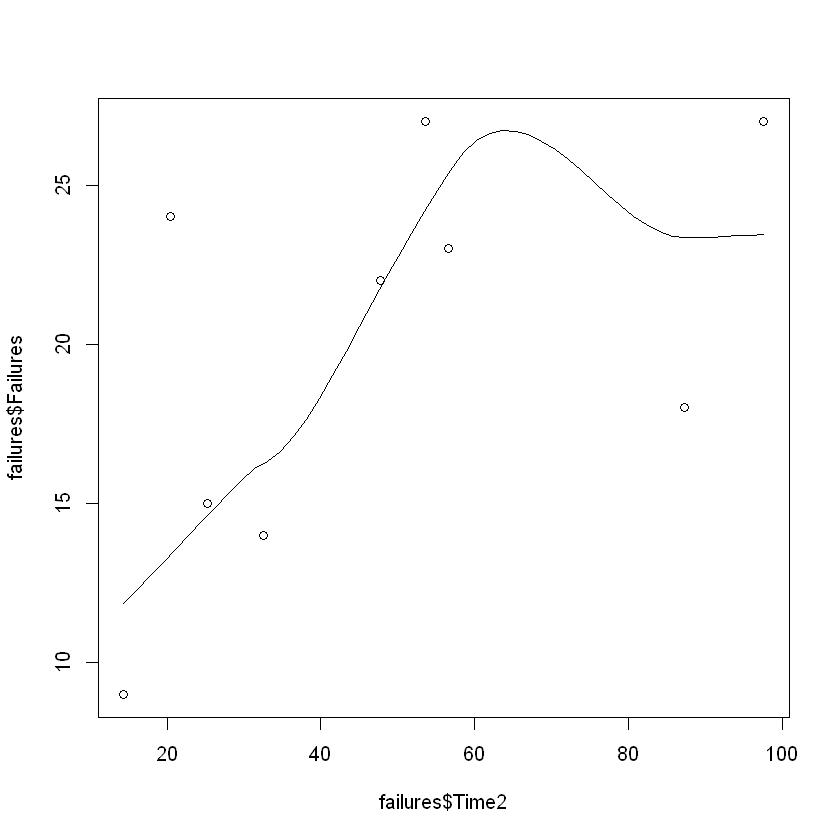

In [5]:
scatter.smooth(failures$Failures ~ failures$Time1)
scatter.smooth(failures$Failures ~ failures$Time2)

In [15]:
glm.1 <- glm(Failures ~ Time1 + Time2, data=failures, family = poisson(link="identity"))

In [16]:
coef(summary(glm.1))

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),5.99772624,3.63544620,1.6497909,0.09898570
Time1,0.12081077,0.04578404,2.6387094,0.00832223
Time2,0.05459375,0.06355954,0.8589386,0.39037437


In [17]:
anova(glm.1, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,8,16.996384,NA
Time1,1,12.106973,7,4.889411,0.0005023362
Time2,1,0.692262,6,4.197149,0.4053960632


In [20]:
gof.dev <- deviance(glm.1)
gof.pearson <- sum(glm.1$weights * glm.1$residuals^2)

pchisq(gof.dev, df=df.residual(glm.1), lower.tail = FALSE)
pchisq(gof.pearson, df=df.residual(glm.1), lower.tail = FALSE)

gof.dev / df.residual(glm.1)
gof.pearson / df.residual(glm.1)


[1] 0.6500162

[1] 0.6554824

[1] 0.6995249

[1] 0.6927804


	Shapiro-Wilk normality test

data:  qresid(glm.1)
W = 0.95146, p-value = 0.7061


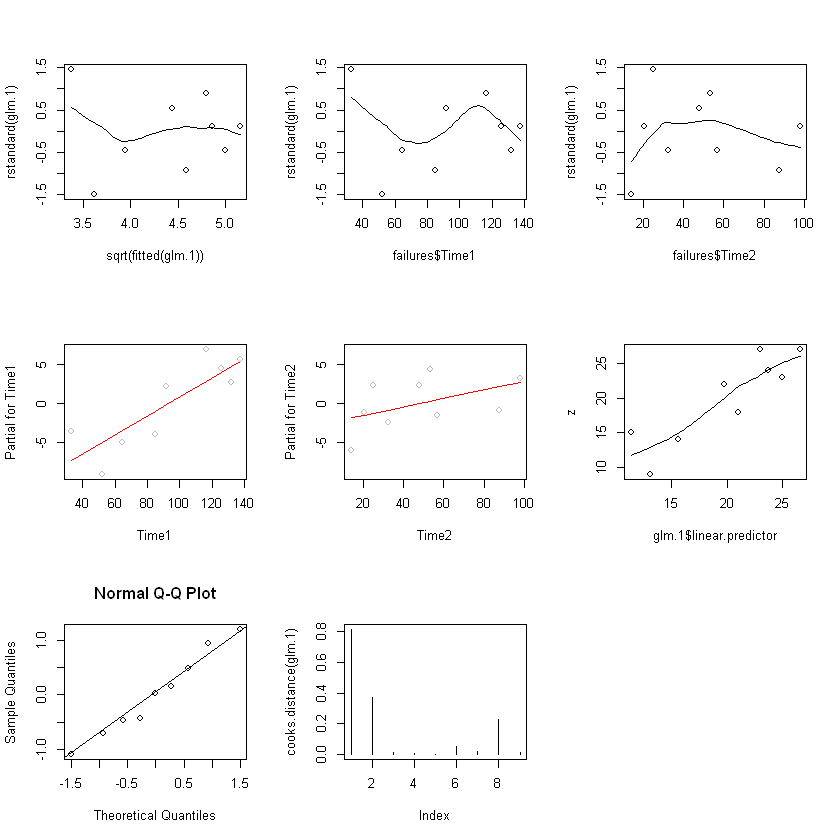

In [21]:
par(mfrow=c(3, 3))

scatter.smooth(rstandard(glm.1) ~ sqrt(fitted(glm.1)))
scatter.smooth(rstandard(glm.1) ~ failures$Time1)
scatter.smooth(rstandard(glm.1) ~ failures$Time2)
termplot(glm.1, partial.resid = TRUE)
z <- resid(glm.1, type="working") + glm.1$linear.predictor
scatter.smooth(z ~ glm.1$linear.predictor)
qqnorm(qresid(glm.1))
qqline(qresid(glm.1))
plot(cooks.distance(glm.1), type="h")
shapiro.test(qresid(glm.1))

In [22]:
colSums(influence.measures(glm.1)$is.inf)

dfb.1_ dfb.Tim1 dfb.Tim2    dffit    cov.r   cook.d      hat 
       2        1        0        1        2        0        0

In [23]:
rowSums(influence.measures(glm.1)$is.inf)

1 2 3 4 5 6 7 8 9 
3 1 0 1 1 0 0 0 0